In [98]:
import uproot
import coffea
import numpy as np
import time

In [185]:
start = time.time()
inputs = '/data/hnl/data18_ntuples/user.dtrischu.data18_13TeV.periodAllYear.pro25_v04_combLRTd0Test_1p0ONLY_v3_with_matveto_tree.root/*.root'
# inputs = '/data/hnl/data18_ntuples/user.dtrischu.data18_13TeV.periodAllYear.pro25_v04_combLRTd0Test_1p0ONLY_v3_with_matveto_tree.root/user.dtrischu.23447292._000590.tree.root'
h_actual_pd = coffea.hist.Hist(
    'actualInteractionsPerCrossing',
    # coffea.hist.Cat('sample', 'data file'),
    coffea.hist.Bin("x", "actualInteractionsPerCrossing", 50, 0, 100),
    )

h_avg_pd = coffea.hist.Hist(
    'averagelInteractionsPerCrossing',
    # coffea.hist.Cat('sample', 'data file'),
    coffea.hist.Bin("x", "averagelInteractionsPerCrossing", 50, 0, 100),
    )

# iterate over files
branches = [
    'actualInteractionsPerCrossing',
    'averageInteractionsPerCrossing',
    ]
counter = 0
for path, filename, df  in uproot.pandas.iterate(inputs, 
                        'outTree',
                        branches,
                        # library='pd', # use pandas library
                        reportpath=True, reportfile=True
                        ):   
    # print(filename)
    h_actual_pd.fill(
        # sample=str(filename), 
        x=df['actualInteractionsPerCrossing'].to_numpy()
        )
    h_avg_pd.fill(
        # sample=str(filename), 
        x=df['averageInteractionsPerCrossing'].to_numpy()
        )


    counter+=1
    if counter % 1000 == 0:
        print()
        print(sum(h_avg_pd.values()[()]), 'events')
    if counter % 100 == 0:
        print('.', end='')
    # if counter > 5000: break


print(sum(h_avg.values()[()]))
sum(h_avg.values()[()])
print ((time.time()-start), 's')
print(sum(h_avg.values()[()]) / (time.time()-start), 'events/second')


......

KeyboardInterrupt: 

In [184]:
import glob
inputs = '/data/hnl/data18_ntuples/user.dtrischu.data18_13TeV.periodAllYear.pro25_v04_combLRTd0Test_1p0ONLY_v3_with_matveto_tree.root/*.root'

print(len(glob.glob(inputs)))

620


In [80]:
help(time.time)

Help on built-in function time in module time:

time(...)
    time() -> floating point number
    
    Return the current time in seconds since the Epoch.
    Fractions of a second may be present if the system clock provides them.



In [96]:
start = time.time()
inputs = '/data/hnl/data18_ntuples/user.dtrischu.data18_13TeV.periodAllYear.pro25_v04_combLRTd0Test_1p0ONLY_v3_with_matveto_tree.root/*.root'
# inputs = '/data/hnl/data18_ntuples/user.dtrischu.data18_13TeV.periodAllYear.pro25_v04_combLRTd0Test_1p0ONLY_v3_with_matveto_tree.root/user.dtrischu.23447292._000590.tree.root'
h_actual = coffea.hist.Hist(
    'actualInteractionsPerCrossing',
    # coffea.hist.Cat('sample', 'data file'),
    coffea.hist.Bin("x", "actualInteractionsPerCrossing", 50, 0, 100),
    )

h_avg = coffea.hist.Hist(
    'averagelInteractionsPerCrossing',
    # coffea.hist.Cat('sample', 'data file'),
    coffea.hist.Bin("x", "averagelInteractionsPerCrossing", 50, 0, 100),
    )

# iterate over files
branches = [
    'actualInteractionsPerCrossing',
    'averageInteractionsPerCrossing',
    ]
counter = 0
for path, filename, arrays  in uproot.iterate(inputs, 
                        'outTree',
                        branches,
                        # library='pd', # use pandas library
                        reportpath=True, reportfile=True
                        ):   
    # print(filename)
    h_actual.fill(
        # sample=str(filename), 
        x=arrays[b'actualInteractionsPerCrossing']
        )
    h_avg.fill(
        # sample=str(filename), 
        x=arrays[b'averageInteractionsPerCrossing']
        )


    counter+=1
    if counter % 1000 == 0:
        print()
        print(sum(h_avg.values()[()]), 'events')
    if counter % 100 == 0:
        print('.', end='')
    if counter > 5000: break

print(sum(h_avg.values()[()]))
sum(h_avg.values()[()])
print ((time.time()-start), 's')
print(sum(h_avg.values()[()]) / (time.time()-start), 'events/second')


......576944625.0
3818.234996318817 s
151102.43375037424 events/second


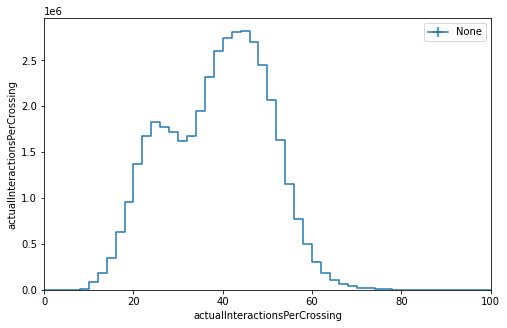

In [178]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,5))
ax = coffea.hist.plot1d(h_actual_pd, stack=False)
# ax.legend().remove()

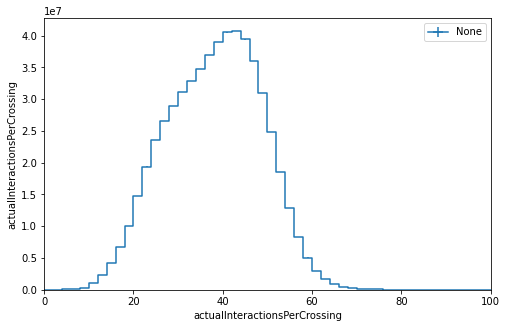

In [180]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,5))
ax = coffea.hist.plot1d(h_actual, stack=False)
# ax.legend().remove()

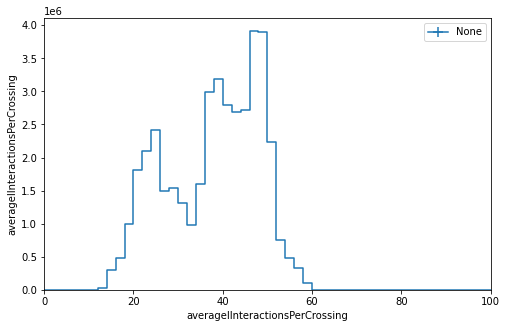

In [179]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,5))
ax = coffea.hist.plot1d(h_avg_pd, stack=False)
# ax.legend().remove()

In [107]:
help(h_actual)

Help on Hist in module coffea.hist.hist_tools object:

class Hist(coffea.processor.accumulator.AccumulatorABC)
 |  Hist(label, *axes, **kwargs)
 |  
 |  Specify a multidimensional histogram.
 |  
 |  Parameters
 |  ----------
 |      label : str
 |          A description of the meaning of the sum of weights
 |      ``*axes``
 |          positional list of `Cat` or `Bin` objects, denoting the axes of the histogram
 |      axes : collections.abc.Sequence
 |          list of `Cat` or `Bin` objects, denoting the axes of the histogram (overridden by ``*axes``)
 |      dtype : str
 |          Underlying numpy dtype to use for storing sum of weights
 |  
 |  Examples
 |  --------
 |  
 |  Creating a histogram with a sparse axis, and two dense axes::
 |  
 |      h = coffea.hist.Hist("Observed bird count",
 |                           coffea.hist.Cat("species", "Bird species"),
 |                           coffea.hist.Bin("x", "x coordinate [m]", 20, -5, 5),
 |                           coffea

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100.])

In [174]:
for val in zip( h_actual.axes()[0].edges(), h_actual.values()[()] ) :
    print(val)

(0.0, 95.0)
(2.0, 15751.0)
(4.0, 87857.0)
(6.0, 177577.0)
(8.0, 355373.0)
(10.0, 1034192.0)
(12.0, 2301774.0)
(14.0, 4205874.0)
(16.0, 6720946.0)
(18.0, 10111786.0)
(20.0, 14743436.0)
(22.0, 19404490.0)
(24.0, 23545512.0)
(26.0, 26522483.0)
(28.0, 28904940.0)
(30.0, 31072007.0)
(32.0, 32888429.0)
(34.0, 34793128.0)
(36.0, 36959806.0)
(38.0, 39022401.0)
(40.0, 40501101.0)
(42.0, 40736952.0)
(44.0, 39400306.0)
(46.0, 36008326.0)
(48.0, 30976774.0)
(50.0, 24893800.0)
(52.0, 18600664.0)
(54.0, 12898834.0)
(56.0, 8344042.0)
(58.0, 5082464.0)
(60.0, 2947125.0)
(62.0, 1656051.0)
(64.0, 914768.0)
(66.0, 489092.0)
(68.0, 265182.0)
(70.0, 157320.0)
(72.0, 92184.0)
(74.0, 54581.0)
(76.0, 30729.0)
(78.0, 13843.0)
(80.0, 6613.0)
(82.0, 3700.0)
(84.0, 1557.0)
(86.0, 727.0)
(88.0, 33.0)
(90.0, 0.0)
(92.0, 0.0)
(94.0, 0.0)
(96.0, 0.0)
(98.0, 0.0)
